Parameters: {'n_neighbors': 1}, Precision: 0.9695150419840786, Recall: 0.9689272385505718
Parameters: {'n_neighbors': 3}, Precision: 0.9704849613640919, Recall: 0.9696013867370977
Parameters: {'n_neighbors': 5}, Precision: 0.9697442039033604, Recall: 0.9687620629768988
Parameters: {'n_neighbors': 7}, Precision: 0.9683655487967202, Recall: 0.9672680589836539
Parameters: {'n_neighbors': 9}, Precision: 0.966833996524403, Recall: 0.9656558108615299
Empieza entrenamiento con los mejores parametros
Matriz de Confusión mejor config:
[[1192    0    1    0    0    0    0    0    0    1]
 [   0 1269    1    0    0    0    0    1    0    1]
 [   4    4 1181    0    0    0    0    6    1    0]
 [   0    0    5 1229    0    2    0    2    1    3]
 [   0    9    0    0 1162    0    0    2    0   14]
 [   0    0    3    7    1 1075    8    0    1    2]
 [   2    0    0    0    1    0 1167    0    0    0]
 [   0   10    1    0    0    0    0 1280    0    6]
 [   3    4    3    5    1    7    0    5 11

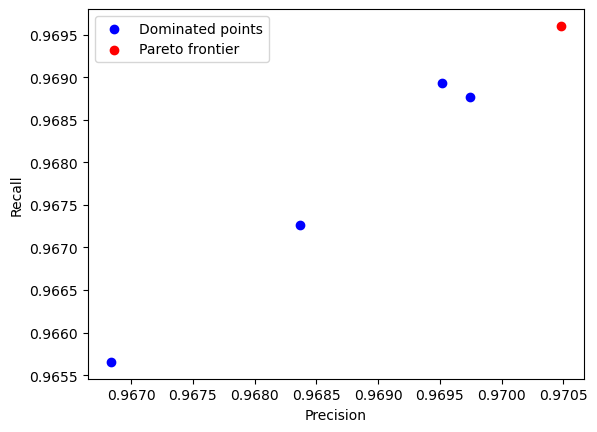

In [1]:
import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import ParameterGrid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from pareto import is_pareto_optimal

# Cargar los datos de MNIST
X_train, y_train = mnist.train_images(), mnist.train_labels()
X_test, y_test = mnist.test_images(), mnist.test_labels()

# Normalizar las imágenes y aplanarlas para que cada imagen sea un vector de características
X_train = X_train.reshape(X_train.shape[0], -1) / 255.
X_test = X_test.reshape(X_test.shape[0], -1) / 255.

# Definir los parámetros a buscar
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}

# Crear el objeto ParameterGrid
grid = ParameterGrid(param_grid)

# Crear el objeto KFold
kf = KFold(n_splits=5)

# Inicializar las variables para almacenar los mejores resultados
best_params = None
best_precision = 0
best_recall = 0
mean_precisions = []
mean_recalls = []





# Iterar sobre todas las combinaciones de parámetros
for params in grid:
    # Inicializar las variables para almacenar los resultados de cada iteración de validación cruzada
    precision_scores = []
    recall_scores = []
    
    # Iterar sobre cada iteración de validación cruzada
    for train_index, test_index in kf.split(X_train):
        # Dividir los datos en conjuntos de entrenamiento y prueba
        X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
        
        # Entrenar el modelo con los datos de entrenamiento y los parámetros actuales
        knn_model = KNeighborsClassifier(**params)
        knn_model.fit(X_train_cv, y_train_cv)
        
        # Evaluar el modelo en el conjunto de prueba
        y_test_pred = knn_model.predict(X_test_cv)
        
        # Calcular la precisión y la exhaustividad y agregarlas a las listas correspondientes
        precision_scores.append(precision_score(y_test_cv, y_test_pred, average='macro'))
        recall_scores.append(recall_score(y_test_cv, y_test_pred, average='macro'))
    
    # Calcular la precisión y la exhaustividad promedio para esta combinación de parámetros
    mean_precision = np.mean(precision_scores)
    mean_recall = np.mean(recall_scores)
    
    # Add the mean precision and mean recall values to their respective lists
    mean_precisions.append(mean_precision)
    mean_recalls.append(mean_recall)
    
    # Print the mean precision and mean recall values for this configuration
    print(f"Parameters: {params}, Precision: {mean_precision}, Recall: {mean_recall}")
    
    # Si la precisión y la exhaustividad son mejores que las mejores hasta ahora, actualizar las variables correspondientes
    if mean_precision > best_precision and mean_recall > best_recall:
        best_params = params
        best_precision = mean_precision
        best_recall = mean_recall
# Convert the lists of mean precision and mean recall values to arrays
mean_precisions = np.array(mean_precisions)
mean_recalls = np.array(mean_recalls)
# Imprimir los mejores parámetros encontrados
print("Empieza entrenamiento con los mejores parametros")

# Entrenar el modelo con los mejores parámetros encontrados
knn_model = KNeighborsClassifier(**best_params)
knn_model.fit(X_train, y_train)
##########################
y_test_pred = knn_model.predict(X_test_cv)

# Calcular la precisión y la exhaustividad y agregarlas a las listas correspondientes
precision_scores.append(precision_score(y_test_cv, y_test_pred, average='macro'))
recall_scores.append(recall_score(y_test_cv, y_test_pred, average='macro'))

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test_cv, y_test_pred)

# Imprimir la matriz de confusión
print('Matriz de Confusión mejor config:')
print(confusion)

# Calcular la precisión y la exhaustividad promedio para esta combinación de parámetros
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)

# Imprimir la precisión y la exhaustividad
print('Precisión: ', mean_precision)
print('Exhaustividad: ', mean_recall)

##########################
# Imprimir los mejores parámetros encontrados
print("Best parameters: ", best_params)
# Find the non-dominated points (i.e., the points on the Pareto frontier)
evalpareto = is_pareto_optimal(np.column_stack((mean_precisions, mean_recalls)))

# Plot the precision/recall space
plt.scatter(mean_precisions[~evalpareto], mean_recalls[~evalpareto], color='blue', label='Dominated points')
plt.scatter(mean_precisions[evalpareto], mean_recalls[evalpareto], color='red', label='Pareto frontier')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend()
plt.show()
